# K-Means

[Source](https://github.com/alirezadir/Machine-Learning-Interviews/blob/main/src/MLC/notebooks/k_means.ipynb)

- Input: data points
- Output: k-clusters

Several steps:
1. Initialize: Randomly initializing k cluster centers.
2. Assign data points to cluster centers: Each data point in the dataset is then assigned to the nearest cluster center based on their distance (often Euclidian distance, Manhatten, or cosine similarity).  At the end all data points are assigned per cluster.
3. Update Mean: New mean for each cluster is calculated by taking the average of all data points of the cluster. The new means becomes the new cluster center.
4. Jump to 2, if not: cluster centers are still updated in 3 OR maximum number of iterations has been reached.
5. Final output: K clusters with their corresponding centroids.

https://aman.ai/primers/ai/interview/#what-is-convergence-in-k-means-clustering

In [ ]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.k, replace=False) # replace ... each index only sampled once.
        print(f"random indices: {random_indices}")
        self.centroids = X[random_indices]
        print(f"centroids: {self.centroids}")
        print("X.shape:", X.shape)

        for _ in range(self.max_iters):
            # (n_samples, 1, n_features) - (k, n_features) → (n_samples, k, n_features)
            labels = self.predict(X)

            # Computes new centroids by taking the mean of all points assigned to each cluster.
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        print(f"distances: {distances}")
        labels = np.argmin(distances, axis=1)
        print(f"labels: {labels}")
        return labels
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)
    
    def get_centroids(self):
        return self.centroids       

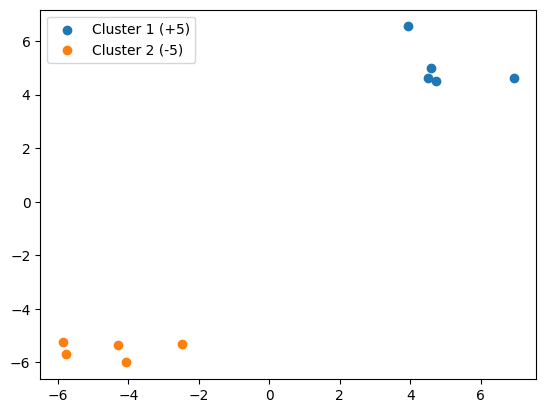

In [25]:
x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1, x2], axis=0)

import matplotlib.pyplot as plt
plt.scatter(x1[:,0], x1[:,1], label='Cluster 1 (+5)')
plt.scatter(x2[:,0], x2[:,1], label='Cluster 2 (-5)')
plt.legend()

In [26]:
# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

random indices: [2 6]
centroids: [[ 3.92398354  6.53873459]
 [-5.77049702 -5.69924493]]
X.shape: (10, 2)
distances: [[ 3.56611155 16.36897861]
 [ 1.69900656 14.87448489]
 [ 0.         15.6125301 ]
 [ 1.99974087 14.55464776]
 [ 2.204355   14.63747421]
 [14.45863732  1.51876098]
 [15.6125301   0.        ]
 [15.31629984  0.46600176]
 [14.86486401  1.73816219]
 [13.47087619  3.31814912]]
labels: [0 0 0 0 0 1 1 1 1 1]
distances: [[ 2.04240059 15.2803246 ]
 [ 0.35454924 13.88050629]
 [ 1.79967195 14.70782192]
 [ 0.61629296 13.55089122]
 [ 0.59336527 13.61842347]
 [13.90940507  0.25941539]
 [15.17083028  1.29106347]
 [14.91775461  1.40031675]
 [14.24807334  0.64418961]
 [12.74148107  2.02753078]]
labels: [0 0 0 0 0 1 1 1 1 1]
distances: [[ 2.04240059 15.2803246 ]
 [ 0.35454924 13.88050629]
 [ 1.79967195 14.70782192]
 [ 0.61629296 13.55089122]
 [ 0.59336527 13.61842347]
 [13.90940507  0.25941539]
 [15.17083028  1.29106347]
 [14.91775461  1.40031675]
 [14.24807334  0.64418961]
 [12.74148107  2.